### Compare the results of exercise 3b  combinations of  transformations to images. 15 epochs each and only 0.25 random subset selected from the train dataset.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [6]:
def plot_train_miou_composite(root_dir, nome_cartelle=['03_Geometric', '03_Weather', '03_Color'], comb_list=[1,2,3,4,5]):
    # Dizionari trasformazioni per categoria
    mapping_transforms = {
        'geometric': {
            'm': 'RandomCrop',
            'n': 'Affine',
            'o': 'Perspective'
        },
        'weather': {
            'f': 'RandomShadow',
            'g': 'RandomFog',
            'h': 'RandomRain',
            'i': 'ISONoise',
            'l': 'GaussianBlur'
        },
        'color': {
            'a': 'HueSaturationValue',
            'b': 'CLAHE',
            'c': 'GaussNoise',
            'd': 'RGBShift',
            'e': 'RandomBrightnessContrast'
        }
    }

    for nome_cartella in nome_cartelle:
        nome_core = nome_cartella.split('_', 1)[1].lower()  # es. geometric, weather, color
        path_categoria = os.path.join(root_dir, nome_cartella)
        if not os.path.isdir(path_categoria):
            continue

        for i in comb_list:
            nome_comb = f"{i}_comb"
            path_comb = os.path.join(path_categoria, nome_comb)
            if not os.path.isdir(path_comb):
                continue

            plt.figure(figsize=(10, 6))
            plotted = False

            for file in os.listdir(path_comb):
                if not file.endswith('.csv'):
                    continue
                if nome_core not in file.lower():
                    continue

                pattern = rf"3b_GTA5_to_CITY_augmented_{nome_core}_(.*?)_25_percent\.csv"
                match = re.search(pattern, file, re.IGNORECASE)
                if not match:
                    continue

                lettere_trasformazioni = match.group(1).split('_')
                if len(lettere_trasformazioni) != i:
                    continue

                diz_transform = mapping_transforms.get(nome_core, {})
                trasformazioni_nomi = [diz_transform.get(l.lower(), l) for l in lettere_trasformazioni]

                file_path = os.path.join(path_comb, file)
                try:
                    df = pd.read_csv(file_path)
                except:
                    continue

                cols_lower = [c.lower() for c in df.columns]
                if 'train_miou' not in cols_lower or 'epoch' not in df.columns:
                    continue

                idx_train_miou = cols_lower.index('train_miou')
                y_col = df.columns[idx_train_miou]

                plt.plot(df['epoch'], df[y_col], marker='o', label=', '.join(trasformazioni_nomi))
                plotted = True

            if plotted:
                plt.title(f"{nome_cartella} - {nome_comb} - train_MIOU for transformations")
                plt.xlabel('epoch')
                plt.ylabel('train_MIOU')
                plt.legend(title='Transformations')
                plt.grid(True)
                plt.tight_layout()
                plt.show()


In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def plot_val_miou_composite(root_dir, nome_cartelle=['03_Geometric', '03_Weather', '03_Color'], comb_list=[1,2,3,4,5]):
    # Dizionari trasformazioni per categoria
    mapping_transforms = {
        'geometric': {
            'm': 'RandomCrop',
            'n': 'Affine',
            'o': 'Perspective'
        },
        'weather': {
            'f': 'RandomShadow',
            'g': 'RandomFog',
            'h': 'RandomRain',
            'i': 'ISONoise',
            'l': 'GaussianBlur'
        },
        'color': {
            'a': 'HueSaturationValue',
            'b': 'CLAHE',
            'c': 'GaussNoise',
            'd': 'RGBShift',
            'e': 'RandomBrightnessContrast'
        }
    }

    for nome_cartella in nome_cartelle:
        nome_core = nome_cartella.split('_', 1)[1].lower()  # es geometric, weather, color
        path_categoria = os.path.join(root_dir, nome_cartella)
        if not os.path.isdir(path_categoria):
            continue

        for i in comb_list:
            nome_comb = f"{i}_comb"
            path_comb = os.path.join(path_categoria, nome_comb)
            if not os.path.isdir(path_comb):
                continue

            plt.figure(figsize=(10, 6))
            plotted = False

            for file in os.listdir(path_comb):
                if not file.endswith('.csv'):
                    continue
                if nome_core not in file.lower():
                    continue

                pattern = rf"3b_GTA5_to_CITY_augmented_{nome_core}_(.*?)_25_percent\.csv"
                match = re.search(pattern, file, re.IGNORECASE)
                if not match:
                    continue

                lettere_trasformazioni = match.group(1).split('_')
                if len(lettere_trasformazioni) != i:
                    continue

                diz_transform = mapping_transforms.get(nome_core, {})
                trasformazioni_nomi = [diz_transform.get(l.lower(), l) for l in lettere_trasformazioni]

                file_path = os.path.join(path_comb, file)
                try:
                    df = pd.read_csv(file_path)
                except Exception as e:
                    print(f"❌ Errore lettura {file}: {e}")
                    continue

                cols_lower = [c.lower() for c in df.columns]

                if 'val_miou' not in cols_lower:
                    # Trova tutte le colonne che iniziano con val_miou tranne val_miou stessa
                    val_miou_cols = [c for c in df.columns if c.lower().startswith('val_miou') and c.lower() != 'val_miou']

                    if val_miou_cols:
                        df['val_miou'] = df[val_miou_cols].mean(axis=1)
                        print(f"✅ 'val_miou' creato come media delle colonne: {val_miou_cols} nel file {file}")
                    else:
                        print(f"❌ 'val_miou' mancante e nessuna colonna 'val_miou*' trovata in {file}")
                        continue

                if 'epoch' not in df.columns:
                    print(f"📉 Colonne mancanti in {file}: {df.columns.tolist()}")
                    continue

                idx_val_miou = [idx for idx, c in enumerate(cols_lower) if c == 'val_miou'][0]
                y_col = df.columns[idx_val_miou]

                plt.plot(df['epoch'], df[y_col], marker='o', label=', '.join(trasformazioni_nomi))
                plotted = True

            if plotted:
                plt.title(f"{nome_cartella} - {nome_comb} - val_MIOU for transformations")
                plt.xlabel('epoch')
                plt.ylabel('val_MIOU')
                plt.legend(title='Transformations')
                plt.grid(True)
                plt.tight_layout()
                plt.show()


In [8]:
def barplot_mious_comparison_per_category(root_dir, nome_cartella, comb_list=[1, 2, 3, 4, 5]):
    """
    For a fixed category (e.g., Color, Weather), this function compares transformation combinations
    by plotting a barplot of the **average train/val mIoU** over all CSV files found.
    """
    # Mapping of transformation letters to readable names
    mapping_transforms = {
            'geometric': {
                'm': 'RandomCrop',
                'n': 'Affine',
                'o': 'Perspective'
            },
            'weather': {
                'f': 'RandomShadow',
                'g': 'RandomFog',
                'h': 'RandomRain',
                'i': 'ISONoise',
                'l': 'GaussianBlur'
            },
            'color': {
                'a': 'HueSaturationValue',
                'b': 'CLAHE',
                'c': 'GaussNoise',
                'd': 'RGBShift',
                'e': 'RandomBrightnessContrast'
            }
        }
    nome_core = nome_cartella.split('_', 1)[1].lower()
    path_categoria = os.path.join(root_dir, nome_cartella)
    
    if not os.path.isdir(path_categoria):
        print(f"Directory not found: {path_categoria}")
        return

    miou_data = []

    for i in comb_list:
        nome_comb = f"{i}_comb"
        path_comb = os.path.join(path_categoria, nome_comb)
        if not os.path.isdir(path_comb):
            continue

        # Temporary storage for all mIoU values for the same transformation combo
        combo_stats = {}

        for file in os.listdir(path_comb):
            if not file.endswith('.csv') or nome_core not in file.lower():
                continue

            pattern = rf"3b_GTA5_to_CITY_augmented_{nome_core}_(.*?)_25_percent\.csv"
            match = re.search(pattern, file, re.IGNORECASE)
            if not match:
                continue

            letters = match.group(1).split('_')
            if len(letters) != i:
                continue

            readable_letters = [mapping_transforms[nome_core].get(l.lower(), l) for l in letters]
            combo_name = f"{i}_{'_'.join(readable_letters)}"

            file_path = os.path.join(path_comb, file)
            try:
                df = pd.read_csv(file_path)
            except:
                continue

            cols_lower = [c.lower() for c in df.columns]
            if 'val_miou' not in cols_lower or 'train_miou' not in cols_lower:
                continue

            val_col = df.columns[cols_lower.index('val_miou')]
            train_col = df.columns[cols_lower.index('train_miou')]

            val_miou = df[val_col].mean()
            train_miou = df[train_col].mean()

            if combo_name not in combo_stats:
                combo_stats[combo_name] = {'val': [], 'train': []}
            combo_stats[combo_name]['val'].append(val_miou)
            combo_stats[combo_name]['train'].append(train_miou)

        # Compute the final average per combination
        for combo, values in combo_stats.items():
            miou_data.append({
                'comb': combo,
                'train_miou': sum(values['train']) / len(values['train']),
                'val_miou': sum(values['val']) / len(values['val'])
            })

    if not miou_data:
        print("No valid data found.")
        return

    df_plot = pd.DataFrame(miou_data)

    x = df_plot['comb']
    train_vals = df_plot['train_miou']
    val_vals = df_plot['val_miou']

    x_indices = range(len(x))
    bar_width = 0.35

    plt.figure(figsize=(14, 6))
    plt.bar(x_indices, train_vals, width=bar_width, label='Train mIoU', color='skyblue')
    plt.bar([i + bar_width for i in x_indices], val_vals, width=bar_width, label='Val mIoU', color='salmon')

    plt.xlabel('Transformation combinations')
    plt.ylabel('Average mIoU')
    plt.title(f'Train/Val mIoU comparison - {nome_cartella}')
    plt.xticks([i + bar_width / 2 for i in x_indices], x, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()


##### 1. TRANSFORMATIONS : GEOMETRIC

**1.1 TRAIN MIOU**

##### 1.1.1 Combinations of 1 transform

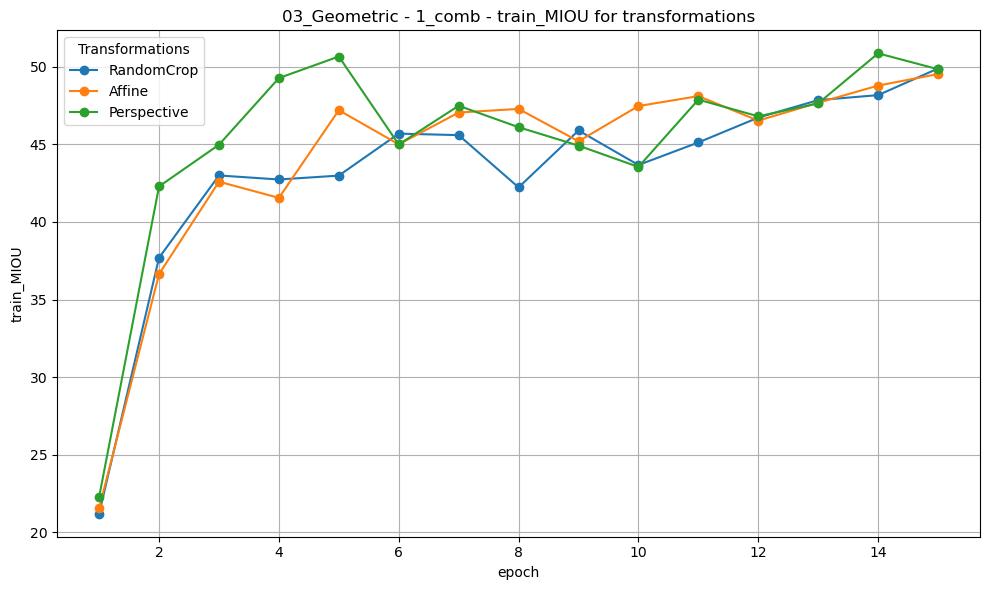

In [9]:
plot_train_miou_composite(root_dir='.', nome_cartelle=['03_Geometric'], comb_list=[1])

When applying only 1 transform, they all look pretty similar regarding the train miou results.

##### 1.1.2 Combinations of 2 transforms


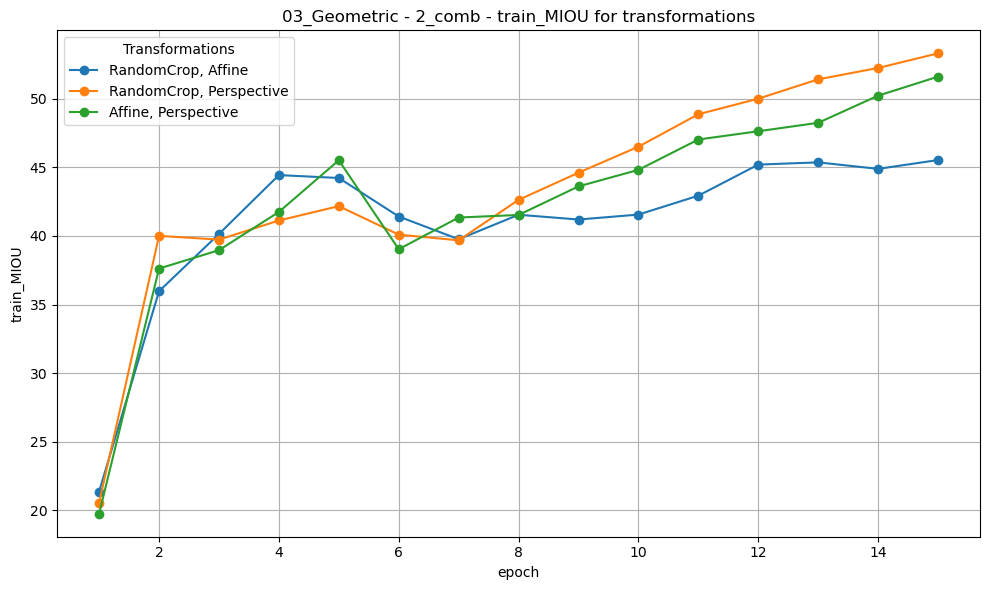

In [10]:
plot_train_miou_composite(root_dir='.', nome_cartelle=['03_Geometric'], comb_list=[2])


When applying 2 transforms, we see that RandromCrop + Affine is almost always below the other two, so we should not consider it.
RandomCrop + Perspective is the best one in the last iterations, seemingly following a trend while being higher than Affine + Perspective.
Thsi results is slighltly better than those obtained with 1 transform.  I suggest we use  RandomCrop + Perspective together.

##### 1.1.3 Combinations of 3 transforms


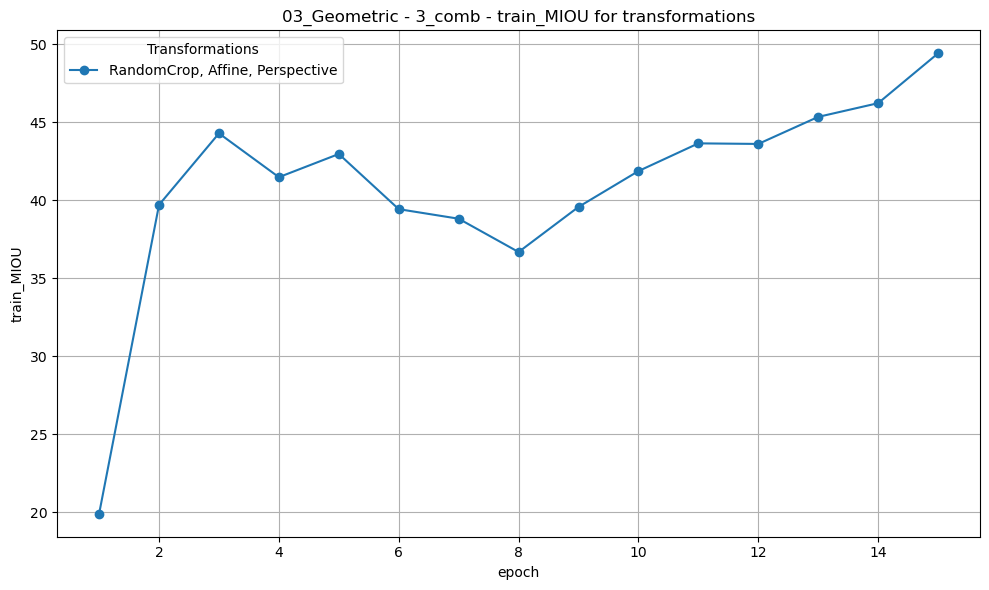

In [11]:
plot_train_miou_composite(root_dir='.', nome_cartelle=['03_Geometric'], comb_list=[3])


When applying all the transforms (3), the results look worse than when using 1 or 2.
Therefore, the ***best*** result is obtained with RandomCrop + Perspective, so if we base our analyisis on TrainMiou, we should apply the transformations **RandomCrop + Perspective** together.

**1.2. VAL MIOU**

##### 1.2.1 Combinations of 1 transform


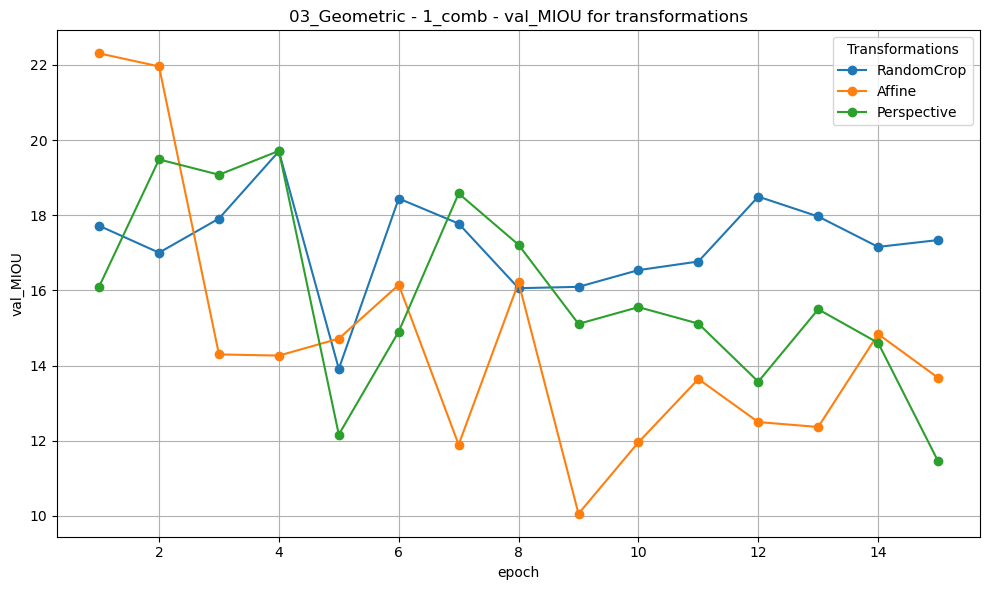

In [12]:
plot_val_miou_composite(  root_dir=".",  nome_cartelle=['03_Geometric'], comb_list=[1] )

When ther is only on transform, RandomCrop seems to eprform better than teh other wrt Valmiou.

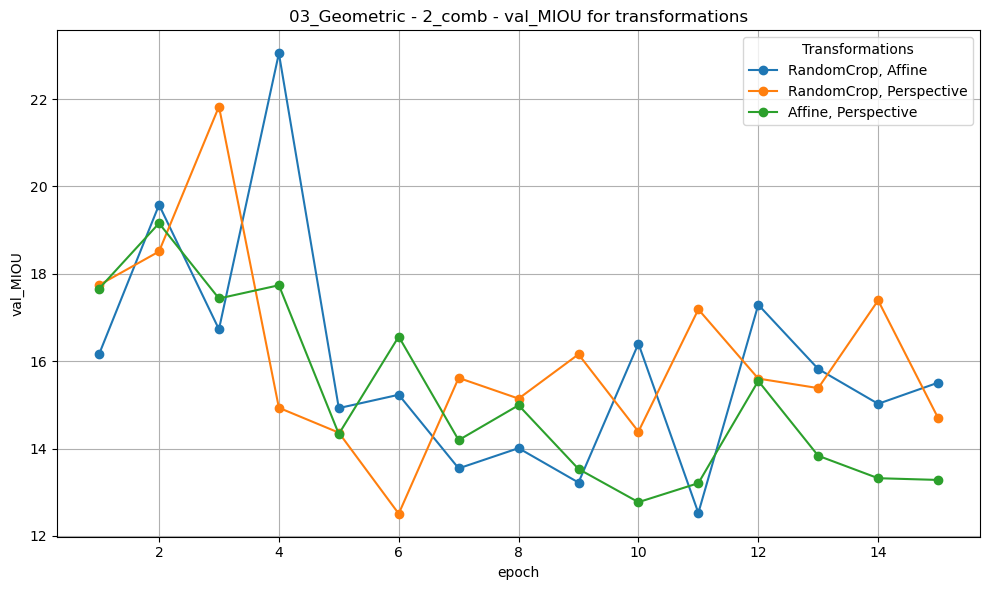

In [13]:
plot_val_miou_composite(
    root_dir=".", 
    nome_cartelle=['03_Geometric'], 
    comb_list=[2]  
)

It's hard to say which one is better, but the worst one is  Affine + Perspective since it is always below the other ones.
Combining two transofrmations gives worse reults than keeping 1 in terons of Val miou.

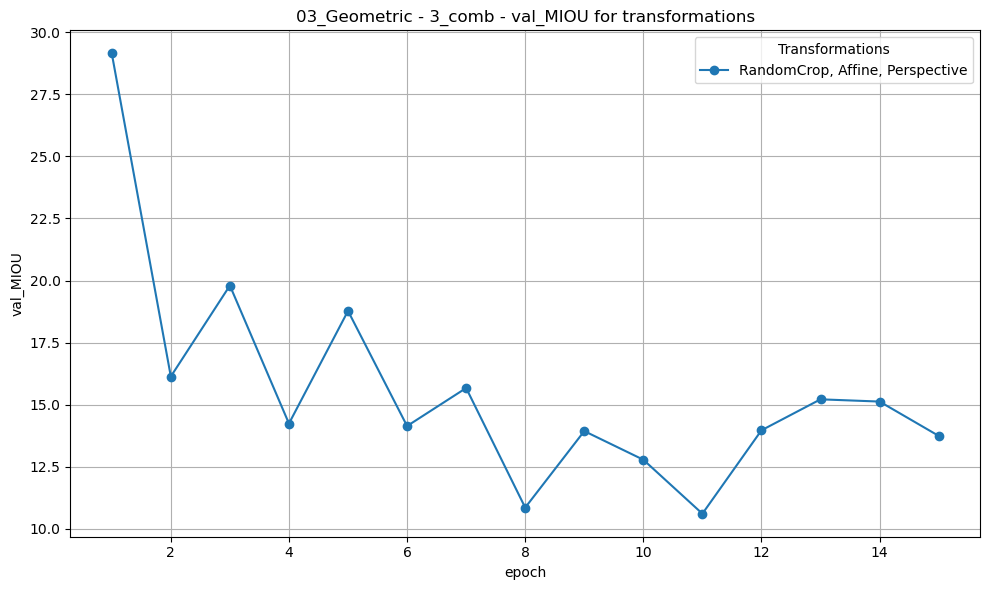

In [14]:
plot_val_miou_composite(
    root_dir=".", 
    nome_cartelle=['03_Geometric'], 
    comb_list=[3]  
)


Applying all 3 together is even worse, like wrt train miou.

#### Now, compare the mean values train vs val miou.

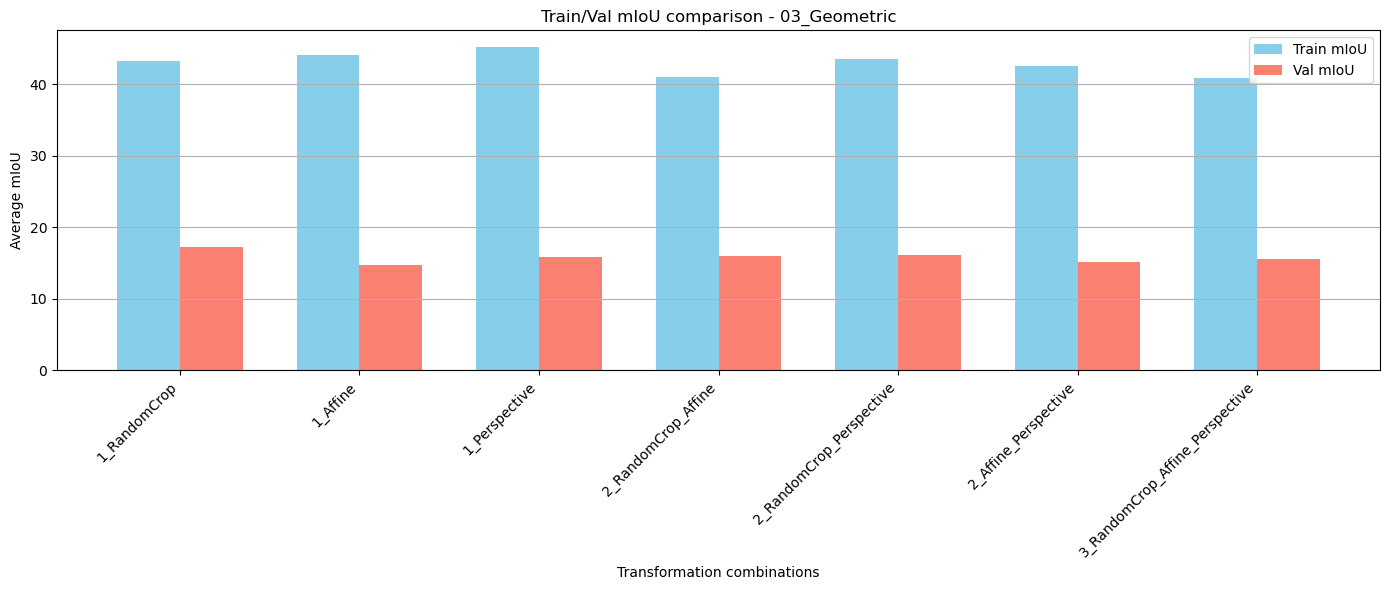

In [15]:
barplot_mious_comparison_per_category('.', '03_Geometric', comb_list=[1,2,3])

NON VEDO NIENTE DI PARTICOLARE.

#### 2.Tranformations: Weather

##### **2.1 TRAIN MIOU**

#### 2.2.1 Combinations of 1 transform

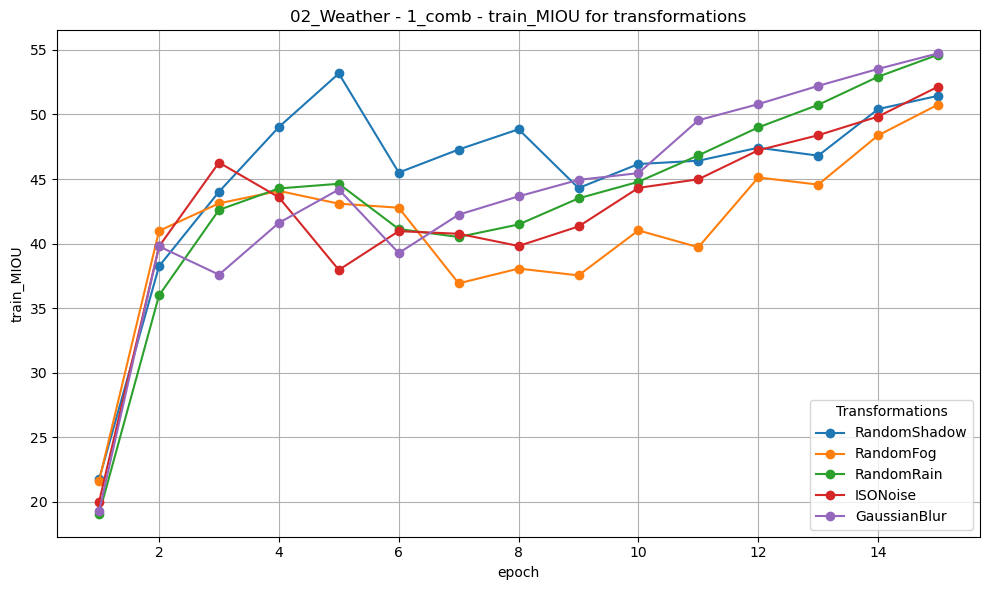

In [16]:
plot_train_miou_composite(root_dir='.', nome_cartelle=['02_Weather'], comb_list=[1])

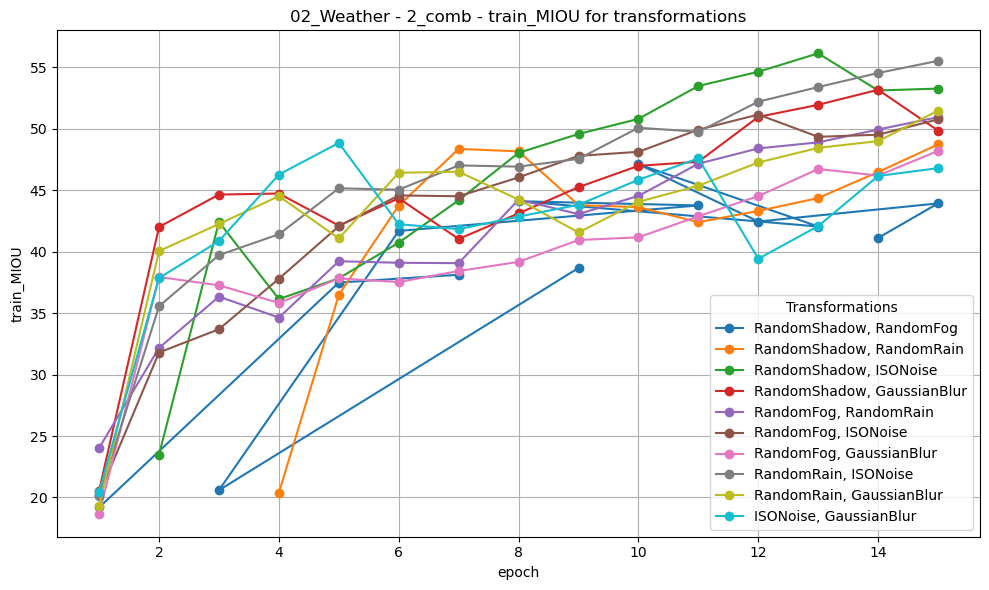

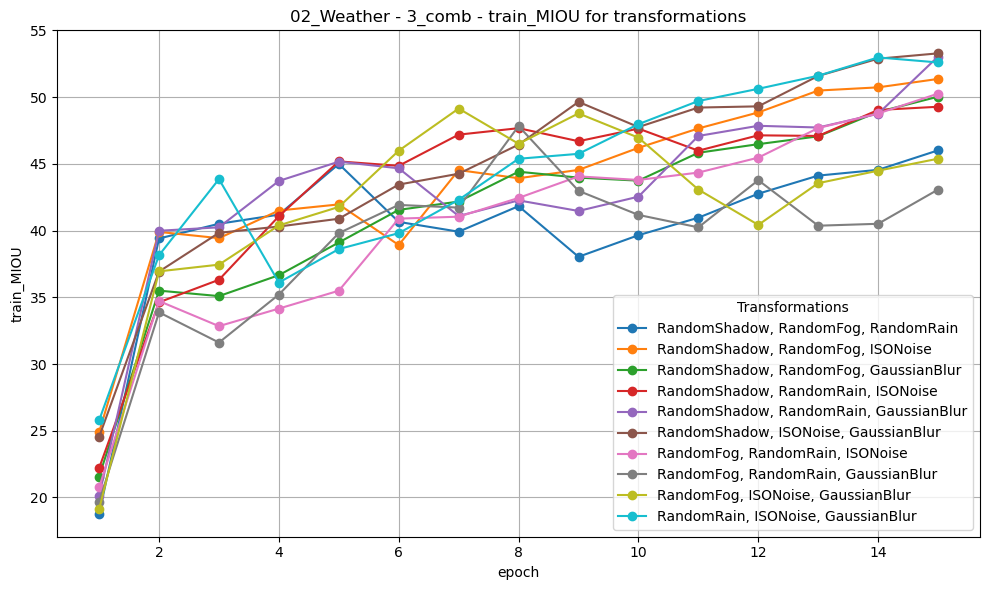

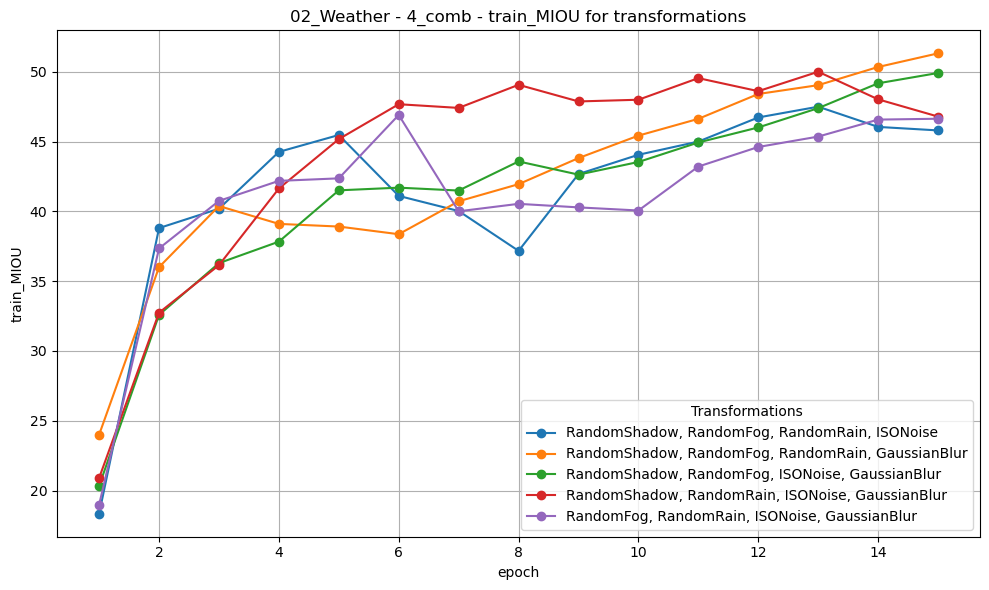

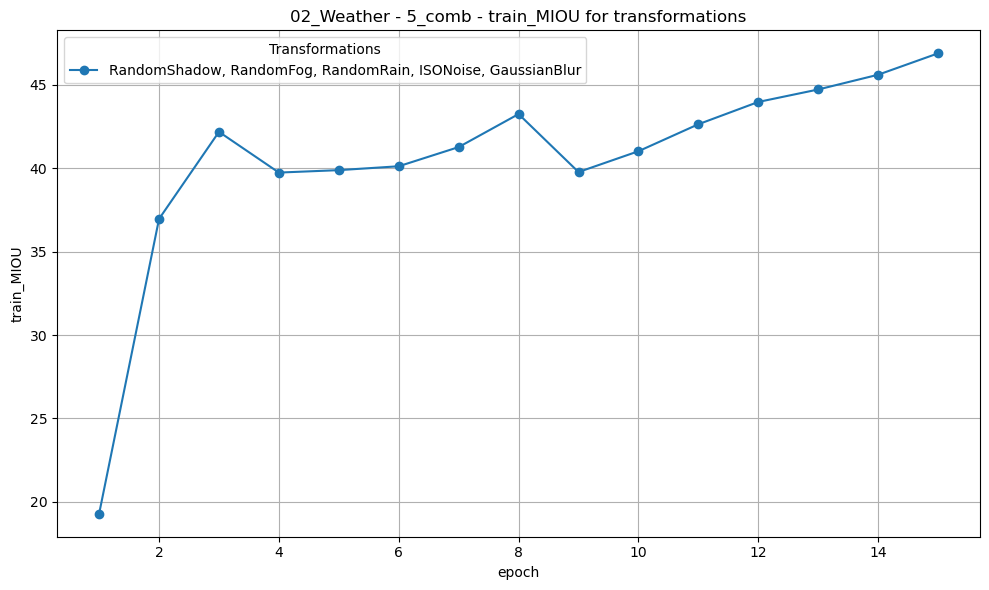

In [17]:
plot_train_miou_composite(root_dir='.', nome_cartelle=['02_Weather'], comb_list=[2,3,4,5])

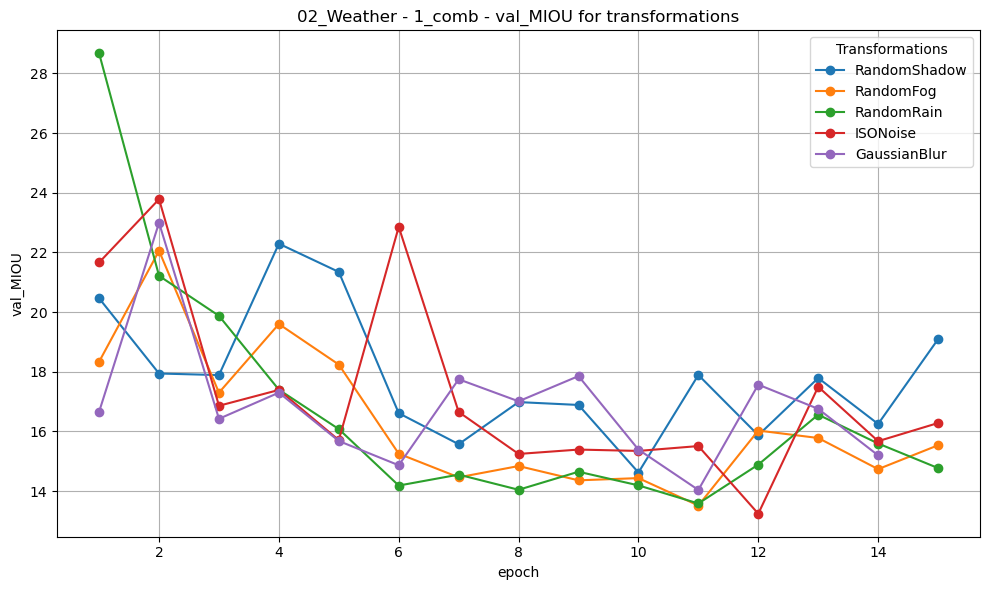

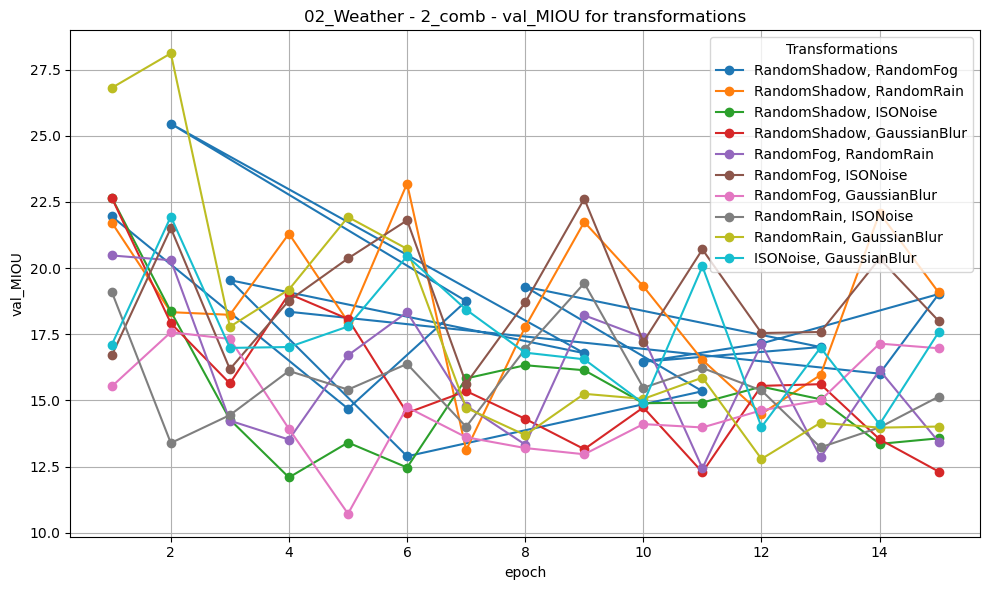

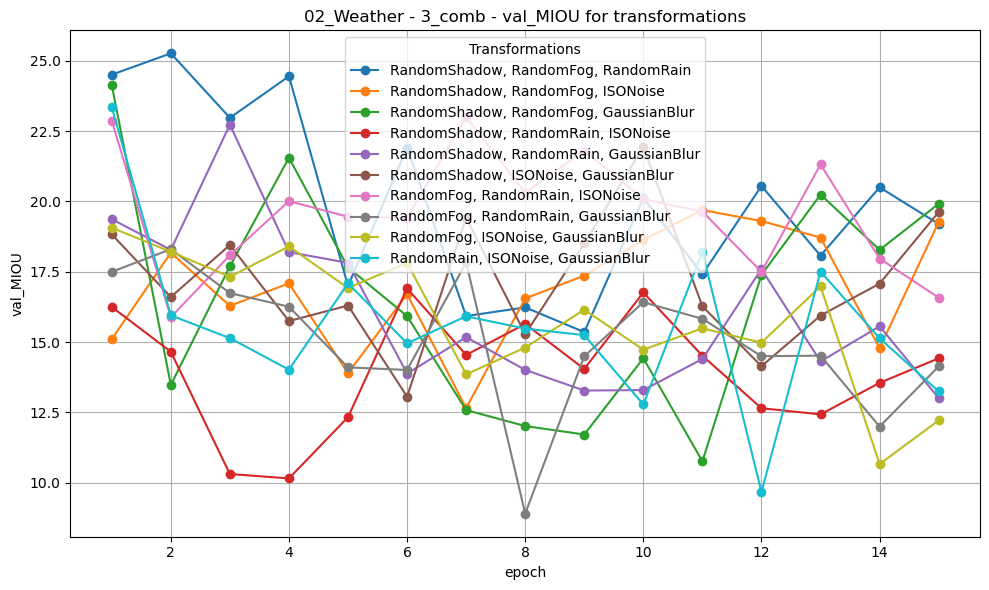

❌ 'val_miou' mancante e nessuna colonna 'val_miou*' trovata in 3b_GTA5_to_CITY_augmented_weather_f_h_i_l_25_percent.csv
❌ 'val_miou' mancante e nessuna colonna 'val_miou*' trovata in 3b_GTA5_to_CITY_augmented_weather_g_h_i_l_25_percent.csv


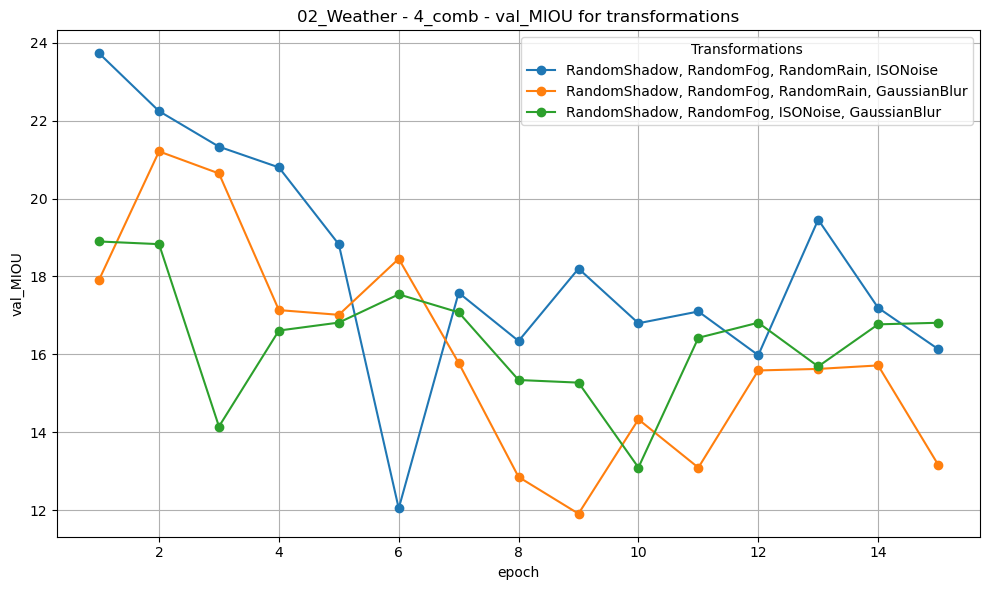

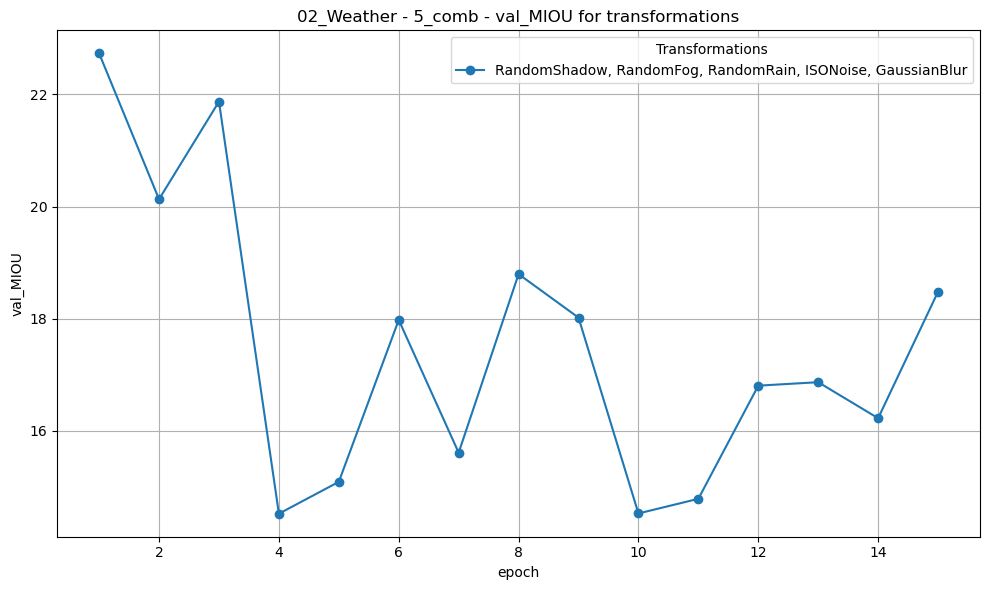

In [18]:
plot_val_miou_composite(root_dir='.', nome_cartelle=['02_Weather'], comb_list=[1,2,3,4,5])

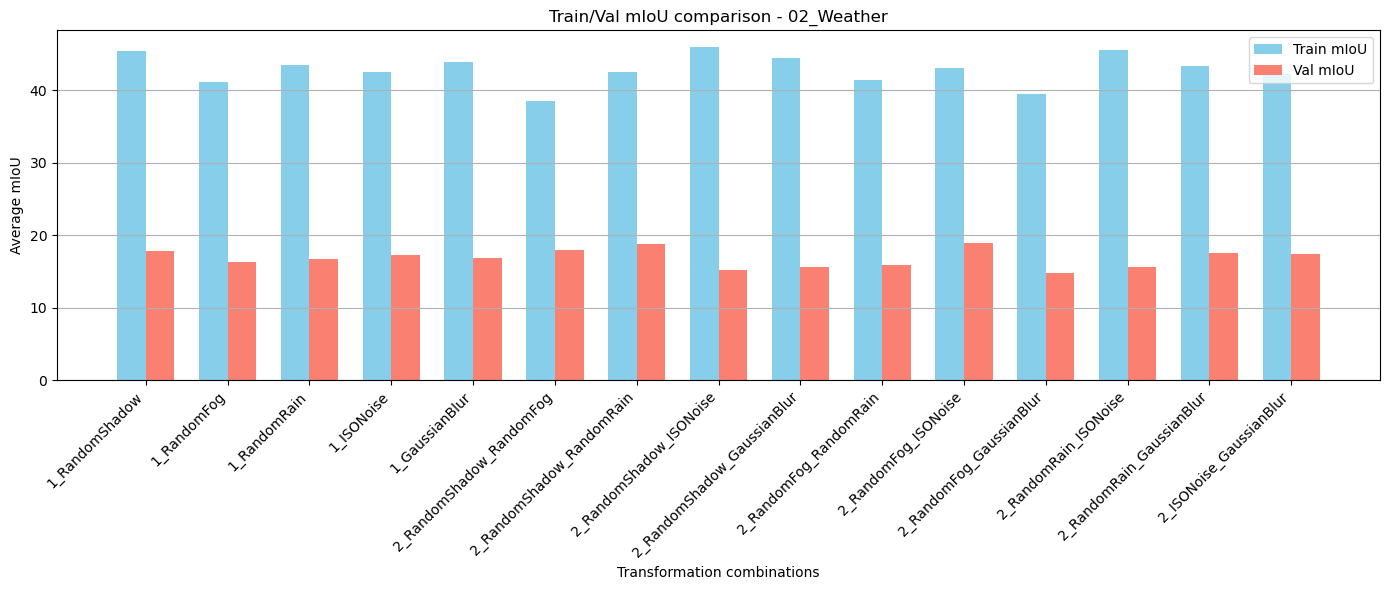

In [19]:
barplot_mious_comparison_per_category('.', '02_Weather', comb_list=[1,2])

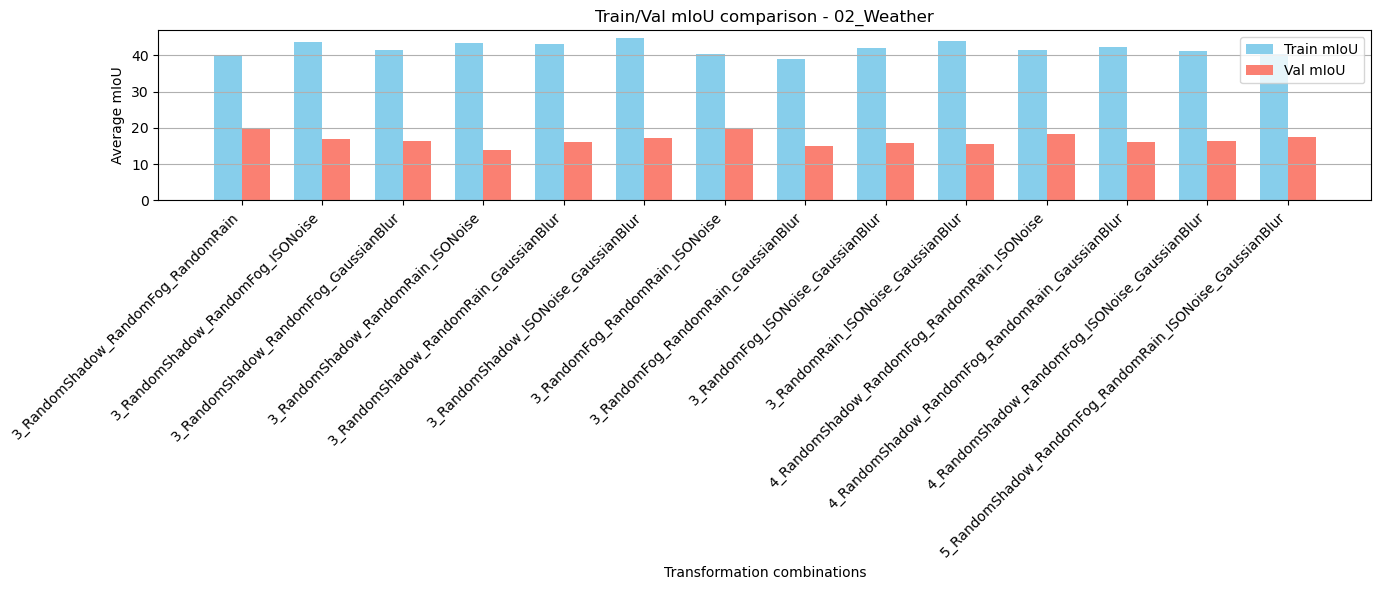

In [20]:
barplot_mious_comparison_per_category('.', '02_Weather', comb_list=[3,4, 5])

In [32]:
import os
import re
import pandas as pd

def summary_val_miou_per_categoria(root_dir, nome_cartelle=['03_Geometric', '03_Weather', '03_Color'], comb_list=[1,2,3,4,5]):
    mapping_transforms = {
        'geometric': {
            'm': 'RandomCrop',
            'n': 'Affine',
            'o': 'Perspective'
        },
        'weather': {
            'f': 'RandomShadow',
            'g': 'RandomFog',
            'h': 'RandomRain',
            'i': 'ISONoise',
            'l': 'GaussianBlur'
        },
        'color': {
            'a': 'HueSaturationValue',
            'b': 'CLAHE',
            'c': 'GaussNoise',
            'd': 'RGBShift',
            'e': 'RandomBrightnessContrast'
        }
    }

    dati = []

    for nome_cartella in nome_cartelle:
        categoria = nome_cartella.split('_', 1)[1].lower()
        path_categoria = os.path.join(root_dir, nome_cartella)
        print(f"CATEGORY: {categoria}, PATH: {path_categoria}")

        if not os.path.isdir(path_categoria):
            print(f"Cartella non trovata: {path_categoria}")
            continue

        for i in comb_list:
            nome_comb = f"{i}_comb"
            path_comb = os.path.join(path_categoria, nome_comb)
            print(f"  Checking combination: {i}, path: {path_comb}")
            if not os.path.isdir(path_comb):
                print(f"    Sottocartella non trovata: {path_comb}")
                continue

            files = os.listdir(path_comb)
            print(f"    Files in '{nome_comb}': {files}")

            for file in files:
                if not file.endswith('.csv'):
                    continue
                if categoria not in file.lower():
                    print(f"    Ignoro file perché categoria '{categoria}' non in nome file: {file}")
                    continue

                pattern = rf"3b_GTA5_to_CITY_augmented_{categoria}_(.*?)_25_percent\.csv"
                match = re.search(pattern, file, re.IGNORECASE)
                if not match:
                    print(f"    Il file non corrisponde al pattern regex: {file}")
                    continue

                lettere_trasformazioni = match.group(1).split('_')
                if len(lettere_trasformazioni) != i:
                    print(f"    Lettere trasformazioni: {lettere_trasformazioni}, atteso: {i} comb, salto file {file}")
                    continue

                diz_transform = mapping_transforms.get(categoria, {})
                trasformazioni_nomi = [diz_transform.get(l.lower(), l) for l in lettere_trasformazioni]
                trasformazioni_str = ', '.join(trasformazioni_nomi)

                file_path = os.path.join(path_comb, file)
                try:
                    df = pd.read_csv(file_path)
                except Exception as e:
                    print(f"    Errore lettura {file}: {e}")
                    continue

                cols_lower = [c.lower() for c in df.columns]

                val_miou_col = None
                for c in df.columns:
                    if c.lower() == 'val_miou':
                        val_miou_col = c
                        break

                if val_miou_col is None:
                    val_miou_cols = [c for c in df.columns if 'val_miou' in c.lower()]
                    if val_miou_cols:
                        df['val_miou'] = df[val_miou_cols].mean(axis=1)
                        val_miou_col = 'val_miou'
                    else:
                        print(f"     --> Nessuna colonna con 'val_miou' trovata nel file {file}")
                        continue

                media_val_miou = df[val_miou_col].mean()

                dati.append({
                    'categoria': categoria,
                    'trasformazioni': trasformazioni_str,
                    'media_val_miou': media_val_miou
                })

    df_risultato = pd.DataFrame(dati)
    if df_risultato.empty:
        print("Nessun dato trovato.")
        return df_risultato

    df_risultato = df_risultato.sort_values(by='media_val_miou', ascending=False).reset_index(drop=True)
    return df_risultato


In [34]:
df_summary = summary_val_miou_per_categoria('.',nome_cartelle=['03_Geometric', '02_Weather'])
df_summary

CATEGORY: geometric, PATH: .\03_Geometric
  Checking combination: 1, path: .\03_Geometric\1_comb
    Files in '1_comb': ['3b_GTA5_to_CITY_augmented_geometric_m_25_percent.csv', '3b_GTA5_to_CITY_augmented_geometric_n_25_percent.csv', '3b_GTA5_to_CITY_augmented_geometric_o_25_percent.csv']
  Checking combination: 2, path: .\03_Geometric\2_comb
    Files in '2_comb': ['3b_GTA5_to_CITY_augmented_geometric_m_n_25_percent.csv', '3b_GTA5_to_CITY_augmented_geometric_m_o_25_percent.csv', '3b_GTA5_to_CITY_augmented_geometric_n_o_25_percent.csv']
  Checking combination: 3, path: .\03_Geometric\3_comb
    Files in '3_comb': ['3b_GTA5_to_CITY_augmented_geometric_m_n_o_25_percent.csv']
  Checking combination: 4, path: .\03_Geometric\4_comb
    Sottocartella non trovata: .\03_Geometric\4_comb
  Checking combination: 5, path: .\03_Geometric\5_comb
    Sottocartella non trovata: .\03_Geometric\5_comb
CATEGORY: weather, PATH: .\02_Weather
  Checking combination: 1, path: .\02_Weather\1_comb
    Files in

,categoria,trasformazioni,media_val_miou
0,weather,"RandomShadow, RandomFog, RandomRain",19.967068
1,weather,"RandomFog, RandomRain, ISONoise",19.597006
2,weather,"RandomFog, ISONoise",18.914657
3,weather,"RandomShadow, RandomRain",18.724965
4,weather,"RandomShadow, RandomFog, RandomRain, ISONoise",18.250957
5,weather,"RandomShadow, RandomFog",17.915296
6,weather,RandomShadow,17.835652
7,weather,"RandomRain, GaussianBlur",17.604914
8,weather,"RandomShadow, RandomFog, RandomRain, ISONoise,...",17.497284
9,weather,"ISONoise, GaussianBlur",17.381105
